# Deep Learning with TensorFlow

![Namespace Logo](../labs.png)

[Install Tensorflow 2 ](https://www.tensorflow.org/install)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('sales.csv')

In [2]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [3]:
X = df.drop(['Price'],axis=1)

In [4]:
y = df['Price']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Data Preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler()

In [9]:
sc.fit(X_train)

MinMaxScaler()

In [10]:
X_train= sc.transform(X_train)

In [11]:
X_test = sc.transform(X_test)

# Building the Model

In [12]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Price
0,561.985028,732.353911,617.229697,557.960379,433.822515,17626.615604
1,661.395572,448.089304,913.175553,986.790667,392.644115,22918.339944
2,810.726439,541.588398,581.677631,947.810958,72.740924,19844.766068
3,89.220403,20.703639,852.602722,796.832513,890.892440,14745.282522
4,1002.105182,818.338370,472.554867,799.261877,121.113012,15104.316428


In [14]:
my_model = Sequential()
my_model.add(Dense(5,activation='relu',input_dim=5))
my_model.add(Dense(5,activation='relu'))
my_model.add(Dense(5,activation='relu'))
my_model.add(Dense(1,activation=keras.activations.linear))
my_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])

In [15]:
model = Sequential(
        [
        Dense(5,activation='relu',input_dim=5),
        Dense(5,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1,activation=keras.activations.linear)
        ]
)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse'])
# batch_size: Number of samples per gradient update, defaults to 32

In [17]:
history = model.fit(X_train,y_train,epochs=100,validation_split = 0.2)

Epoch 1/100
175/175 [==============================] - 0s 2ms/step - loss: 240293968.0000 - mse: 240293968.0000 - val_loss: 237830560.0000 - val_mse: 237830560.0000
Epoch 2/100
175/175 [==============================] - 0s 1ms/step - loss: 240233184.0000 - mse: 240233184.0000 - val_loss: 237619840.0000 - val_mse: 237619840.0000
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 239284080.0000 - mse: 239284080.0000 - val_loss: 235536800.0000 - val_mse: 235536800.0000
Epoch 4/100
175/175 [==============================] - 0s 1ms/step - loss: 235167792.0000 - mse: 235167792.0000 - val_loss: 229020208.0000 - val_mse: 229020208.0000
Epoch 5/100
175/175 [==============================] - 0s 1ms/step - loss: 225231520.0000 - mse: 225231520.0000 - val_loss: 215489232.0000 - val_mse: 215489232.0000
Epoch 6/100
175/175 [==============================] - 0s 2ms/step - loss: 207218800.0000 - mse: 207218800.0000 - val_loss: 193167184.0000 - val_mse: 193167184.0000
Epoch 7/10

## Model Evaluation

In [18]:
from sklearn import metrics

In [19]:
predictions = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1899.2783299722357
MSE: 6028271.121583031
RMSE: 2455.253779466194


In [20]:
y_test.shape

(3000,)

In [21]:
predictions.shape

(3000, 1)

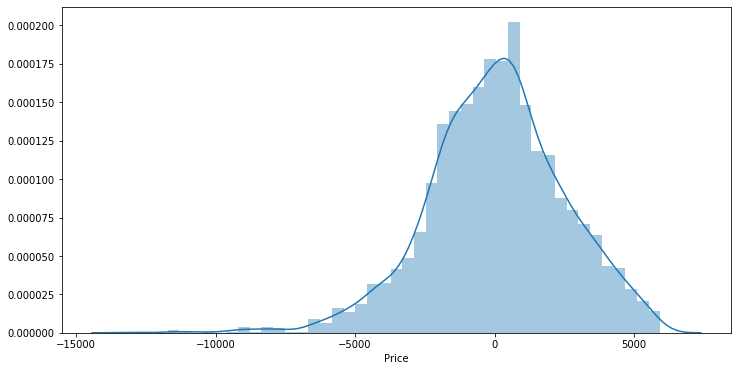

In [22]:
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions.reshape(3000,)));

# Plotting the Model Loss

In [23]:
losses = pd.DataFrame(history.history)

In [24]:
losses

,loss,mse,val_loss,val_mse
0,240293968.0,240293968.0,237830560.0,237830560.0
1,240233184.0,240233184.0,237619840.0,237619840.0
2,239284080.0,239284080.0,235536800.0,235536800.0
3,235167792.0,235167792.0,229020208.0,229020208.0
4,225231520.0,225231520.0,215489232.0,215489232.0
...,...,...,...,...
95,6325966.5,6325966.5,6196085.0,6196085.0
96,6323079.5,6323079.5,6196824.0,6196824.0
97,6320941.5,6320941.5,6193266.0,6193266.0
98,6318114.5,6318114.5,6194090.5,6194090.5


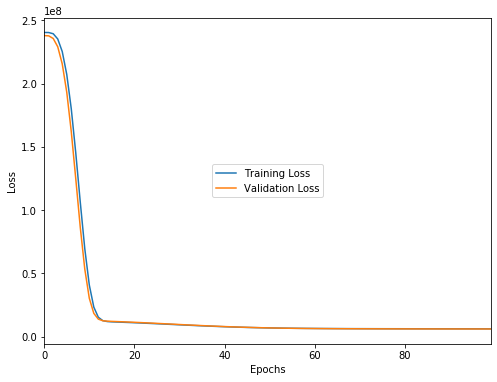

In [25]:
plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label='Training Loss')
losses['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

Happy Learning!